In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv('Housing.csv')
df.head() 
M=len(df)
M

545

In [4]:
#Description
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
iterations = 200
learning_rate = 0.01

In [6]:
df.replace({'yes': 1, 'no': 0}, inplace=True)
df_reg = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning','prefarea']]
data=df_reg[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price', 'mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning','prefarea']]

train_data, eval_data = train_test_split(data, test_size=0.2, random_state=42)
train_data


,area,bedrooms,bathrooms,stories,parking,price,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
46,6000,3,2,4,1,7525000,1,0,0,0,1,0
93,7200,3,2,1,3,6300000,1,0,1,0,1,0
335,3816,2,1,1,2,3920000,1,0,1,0,1,0
412,2610,3,1,2,0,3430000,1,0,1,0,0,1
471,3750,3,1,2,0,3010000,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,0,6755000,1,0,0,0,1,0
106,5450,4,2,1,0,6160000,1,0,1,0,1,1
270,4500,3,2,3,1,4340000,1,0,0,1,0,0
435,4040,2,1,1,0,3290000,1,0,0,0,0,0


In [7]:
X1at=train_data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
X1at=(X1at-X1at.mean())/X1at.std()
X1at=X1at.values
X1ae=eval_data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
X1ae=(X1ae-X1ae.mean())/X1ae.std()
X1ae=X1ae.values

In [8]:
Yt = train_data[['price']]
Yt=Yt.values
Ye = eval_data[['price']]
Ye=Ye.values

In [9]:
def predicted_y(theta,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(theta@x[i]+intercept)
    return np.array(y_lst)

def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

def dldt(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s

def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

def gradient_descent(x,y,learning_rate,iterations):
    theta_vector=np.zeros(x.shape[1])
    intercept=0
    n = len(x)
    linear_loss=[]

    for i in range(iterations):
        
        
        y_predicted = predicted_y(theta_vector,x,intercept)
        
        theta_vector = theta_vector - learning_rate *dldt(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
    
    return theta_vector,intercept, linear_loss

In [10]:
t,b,l=gradient_descent(X1at,Yt,learning_rate,iterations)

In [11]:
print("theta:",t)
print("bias:",b)

theta: [665149.58165594 141200.38682384 552882.93803997 410443.7244609
 299885.77102453]
bias: [4623749.23296971]


In [12]:
def predict(inp, t, b):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(t@inp[i]+b)
    return np.array(y_lst)

In [13]:
y_pred=predict(X1ae, t, b)

In [14]:
def lossComp(y, y_predicted, iterations, linear_loss):
    experimental_loss=[]
    for i in range(iterations):
        experimental_loss.append(loss(y,y_predicted))
    plt.plot(np.arange(1,iterations),linear_loss[1:])
    plt.plot(np.arange(1,iterations),experimental_loss[1:])
    plt.xlabel("number of iterations")
    plt.ylabel("loss")

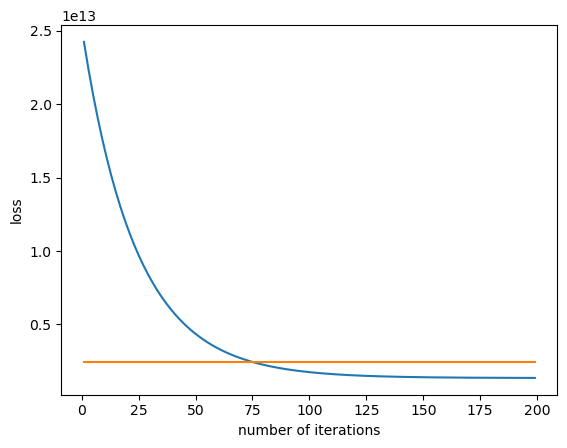

In [15]:
lossComp(Ye, y_pred, iterations, l)

In [16]:
X1bt=train_data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking','mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning','prefarea']]
X1bt=(X1bt-X1bt.mean())/X1bt.std()
X1bt=X1bt.values
X1be=eval_data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking','mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning','prefarea']]
X1be=(X1be-X1be.mean())/X1be.std()
X1be=X1be.values

In [17]:
t2,b2,l2=gradient_descent(X1bt,Yt,learning_rate,iterations)

In [18]:
print("theta:",t2)
print("bias:",b2)

theta: [504926.19719824  92710.52451038 515442.60724878 342937.81788906
 221087.20361399 158177.59394075 111285.58249579 188796.99542608
 152973.58907092 375413.69405091 264526.21827774]
bias: [4623749.23296971]


In [19]:
y_pred2=predict(X1be, t2, b2)

In [20]:
def lossCompDouble(y, y_predictedA, y_predictedB, iterations, linear_lossA, linear_lossB):
    experimental_lossA=[]
    experimental_lossB=[]
    for i in range(iterations):
        experimental_lossA.append(loss(y,y_predictedA))
    for i in range(iterations):
        experimental_lossB.append(loss(y,y_predictedB))
    plt.plot(np.arange(1,iterations),linear_lossA[1:], label='Loss Training', linestyle='-', marker='x', color='b')
    plt.plot(np.arange(1,iterations),experimental_lossA[1:], label='Loss Validation', linestyle='-', marker='x', color='b')
    plt.plot(np.arange(1,iterations),linear_lossB[1:], label='Normalize Training', linestyle='--', marker='s', color='r')
    plt.plot(np.arange(1,iterations),experimental_lossB[1:], label='Normalize Validation', linestyle='--', marker='s', color='r')
    plt.xlabel("number of iterations")
    plt.ylabel("loss")

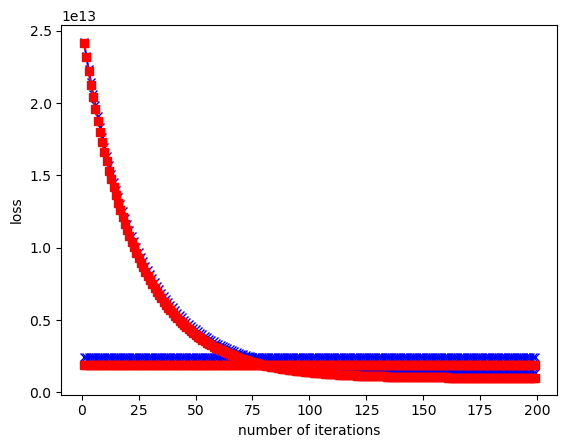

In [21]:
lossCompDouble(Ye, y_pred, y_pred2, iterations, l, l2)
#With the additional binary classifications, the overall loss has decreased. Blue for 1a, red for 1b.

In [22]:
def normalize(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    X_norm = (X - X_min) / (X_max - X_min)
    return X_norm

In [23]:
def standardize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_std = (X - mu) / sigma
    return X_std

In [24]:
X2atn=normalize(X1at)
X2aen=normalize(X1ae)

In [25]:
X2ats=standardize(X1at)
X2aes=standardize(X1ae)

In [ ]:
t3,b3,l3=gradient_descent(X2atn,Yt,learning_rate,iterations)
t4,b4,l4=gradient_descent(X2ats,Yt,learning_rate,iterations)
y_pred3=predict(X2aen, t3, b3)
y_pred4=predict(X2aes, t4, b4)

In [ ]:
def lossCompTriple(y, y_predictedA, y_predictedB, y_predictedC, iterations, linear_lossA, linear_lossB, linear_lossC):
    experimental_lossA=[]
    experimental_lossB=[]
    experimental_lossC=[]
    for i in range(iterations):
        experimental_lossA.append(loss(y,y_predictedA))
    for i in range(iterations):
        experimental_lossB.append(loss(y,y_predictedB))
    for i in range(iterations):
        experimental_lossC.append(loss(y,y_predictedC))
    plt.plot(np.arange(1,iterations),linear_lossA[1:], label='Loss Training', linestyle='-', marker='o', color='b')
    plt.plot(np.arange(1,iterations),experimental_lossA[1:], label='Loss Validation', linestyle='-', marker='o', color='b')
    plt.plot(np.arange(1,iterations),linear_lossB[1:], label='Normalize Training', linestyle='--', marker='x', color='r')
    plt.plot(np.arange(1,iterations),experimental_lossB[1:], label='Normalize Validation', linestyle='--', marker='x', color='r')
    plt.plot(np.arange(1,iterations),linear_lossC[1:], label='Standardized Training', linestyle='-.', marker='s', color='g')
    plt.plot(np.arange(1,iterations),experimental_lossC[1:], label='Standardized Training', linestyle='-.', marker='s', color='g')
    plt.xlabel("number of iterations")
    plt.ylabel("loss")

In [ ]:
lossCompTriple(Ye, y_pred, y_pred3, y_pred4, iterations, l, l3, l4)
#Red is Normalized, Green is standardized
#Note: Differences between Loss and Standardized are minimal. Former is blue, latter is green.Normalization has an impact in speading up learning slightly and increasing evaluation loss, increasing end loss.

In [ ]:
X2btn=normalize(X1bt)
X2ben=normalize(X1be)

In [ ]:
X2bts=standardize(X1bt)
X2bes=standardize(X1be)

In [ ]:
t5,b5,l5=gradient_descent(X2btn,Yt,learning_rate,iterations)
t6,b6,l6=gradient_descent(X2bts,Yt,learning_rate,iterations)
y_pred5=predict(X2ben, t5, b5)
y_pred6=predict(X2bes, t6, b6)

In [ ]:
lossCompTriple(Ye, y_pred2, y_pred5, y_pred6, iterations, l2, l5, l6)
#Red is Normalized, Green is standardized
#More binary data has a noticable inpact in further speeding up normal graph loss reduction and has a slightly lower evaluation loss

In [ ]:
def lossRidge(y,y_predicted,theta,Lambda):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    Ridge = Lambda * sum(t**2 for t in theta)
    
    return (1/n)*s + Ridge

In [ ]:
def gradient_descentRidge(x,y,learning_rate,iterations):
    theta_vector=np.zeros(x.shape[1])
    intercept=0
    n = len(x)
    linear_loss=[]
    Lambda = 0.20

    for i in range(iterations):
        
        
        y_predicted = predicted_y(theta_vector,x,intercept)
        
        theta_vector = theta_vector - learning_rate *dldt(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(lossRidge(y,y_predicted,theta_vector,Lambda))
    
    return theta_vector,intercept, linear_loss

In [ ]:
t7,b7,l7=gradient_descentRidge(X2atn,Yt,learning_rate,iterations)
t8,b8,l8=gradient_descentRidge(X2ats,Yt,learning_rate,iterations)
y_pred7=predict(X2aen, t7, b7)
y_pred8=predict(X2aes, t8, b8)

In [ ]:
lossCompDouble(Ye, y_pred7, y_pred8, iterations, l7, l8)
#Sandardized is Red, Normlized is Blue
#With Ridge implemented for studying this complex data, Standardization now has overall lower loss than normalization.

In [ ]:
t9,b9,l9=gradient_descentRidge(X2btn,Yt,learning_rate,iterations)
t0,b0,l0=gradient_descentRidge(X2bts,Yt,learning_rate,iterations)
y_pred5=predict(X2ben, t9, b9)
y_pred6=predict(X2bes, t0, b0)

In [ ]:
lossCompDouble(Ye, y_pred9, y_pred0, iterations, l9, l0)